## <span style="color:blue; font-weight : bold; font-family:'Calibri';">BoomBikes - Multiple Linear Regression</span>

### <span style=" font-family:'abadi';font-style:italic;">BoomBikes suffered considerable dips in revenues due to the pandemic and want to understand the factors affecting the demand for the shared bikes market in America.</span>

* <span style=" font-family:'abadi';font-style:italic;">Which variables significantly predict the demand for shared bikes.</span>
* <span style=" font-family:'abadi';font-style:italic;">How well those variables describe the bike demands</span>

## <span style="color:blue; font-weight : bold; font-family:'Calibri';">Business Goal</span>

### <span style=" font-family:'abadi';font-style:italic;">Model the demand to manipulate the business strategy to understand the dynamics of a new market</span>

* <span style=" font-family:'abadi';font-style:italic;">Data Preparation.</span>
* <span style=" font-family:'abadi';font-style:italic;">Model Building and Evaluation</span>

### <span style="color:blue; font-weight : bold; font-family:'Calibri';">Importing Libraries, Reading Data</span>

In [4]:
#import libraries and ignore warnings

import calendar
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [5]:
#Setting display option
pd.set_option("display.max_columns",300)
pd.set_option('display.max_rows',300)

In [6]:
# reading the dataset
bike=pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [7]:
#check the data type
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#understand the statistical information of the dataframe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <span style="color:blue; font-weight : bold; font-family:'Calibri';">Data Quality and rectification</span>

In [10]:
#check missing values in the dataset
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#drop columns instant, dteday, casual, registered as the data is available in the other columns and are not required for the analysis
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [12]:
bike.shape

(730, 12)

In [13]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
#check the nonunique
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [16]:
#change numeric to understandable language
bike.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'worst'},inplace=True)

In [17]:
bike['mnth']=bike['mnth'].apply(lambda x:calendar.month_name[x])
bike['weekday']=bike['weekday'].apply(lambda x:calendar.day_name[x])

In [18]:
#check the dataframe values
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Sunday,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Monday,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Tuesday,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Wednesday,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Thursday,1,good,9.305237,11.46350,43.6957,12.522300,1600


## <span style="color:blue; font-weight : bold; font-family:'Calibri';">Visualisation and Analysis</span>

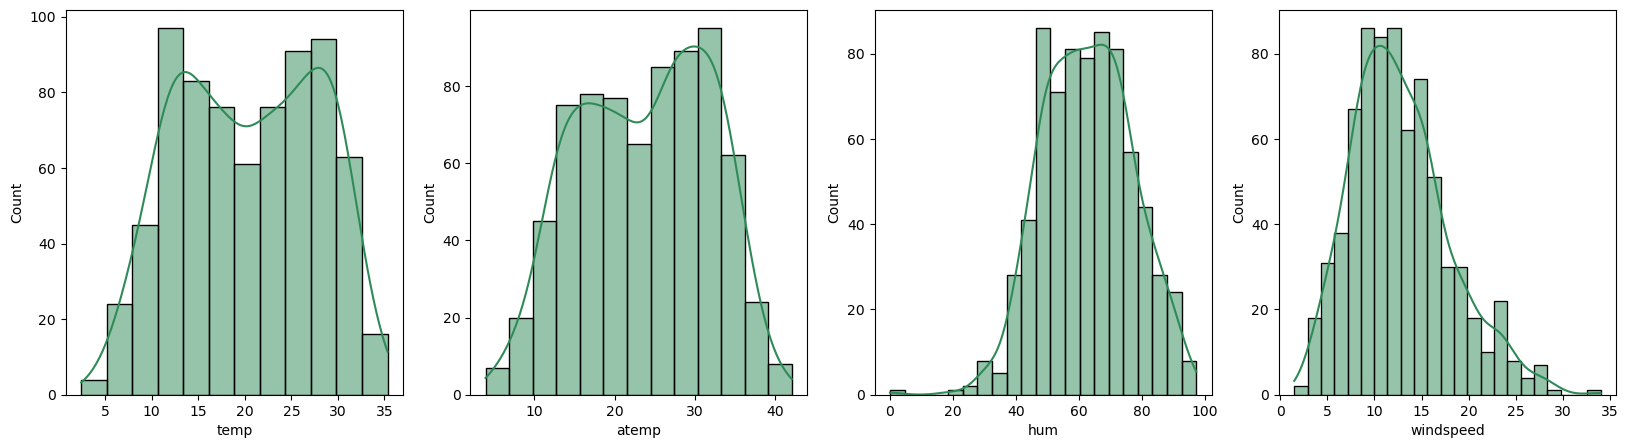

In [20]:
plotconfig={'temp':'seagreen','atemp':'seagreen','hum':'seagreen','windspeed':'seagreen'}
fig, ax=plt.subplots(1,4,figsize=(20,5))
[sns.histplot(data=bike,x=cont,ax=ax[i],color=color,kde=True) for i,(cont,color) in enumerate(plotconfig.items())]
plt.show()

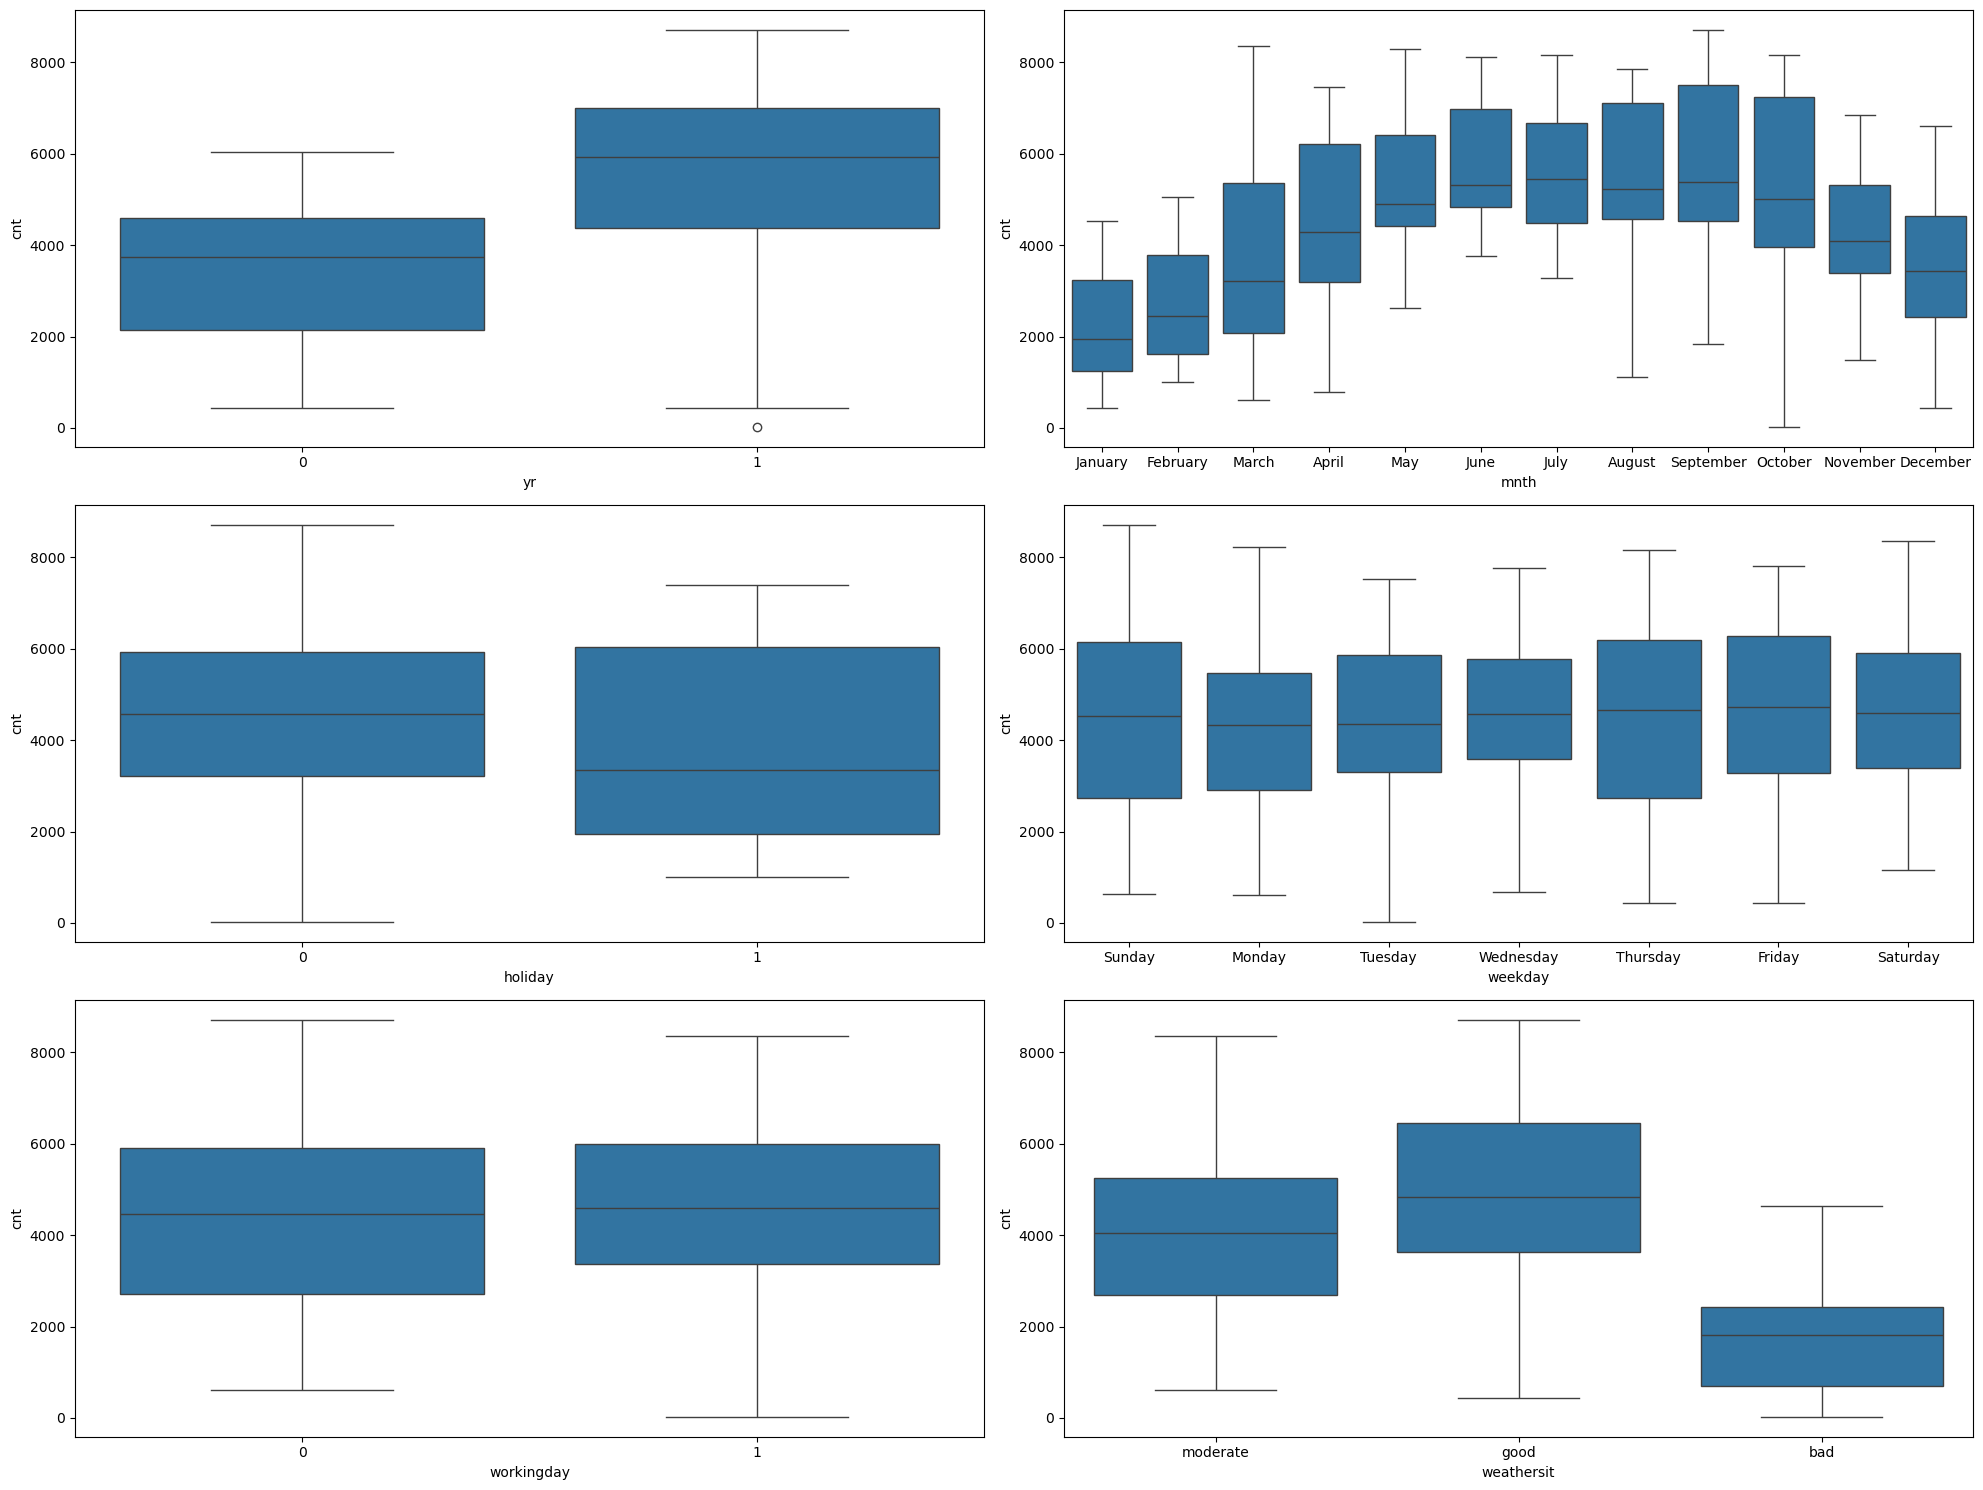

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(3,2,2)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(3,2,3)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(3,2,4)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(3,2,5)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.subplot(3,2,6)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.tight_layout()

<Figure size 1500x3000 with 0 Axes>

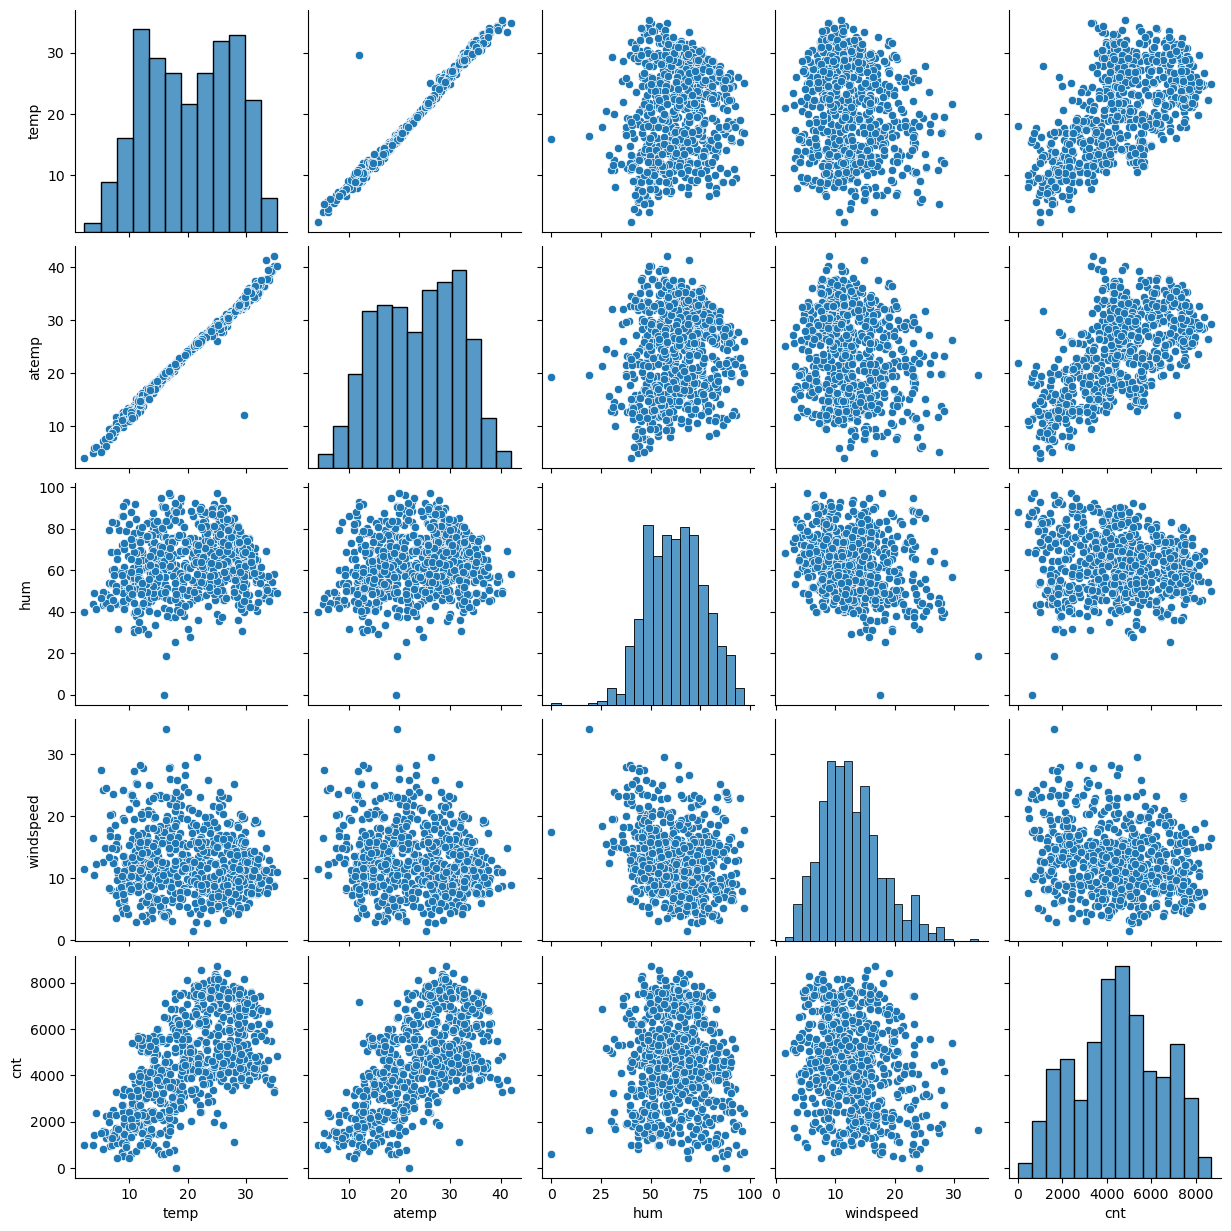

In [22]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

<Figure size 1500x3000 with 0 Axes>

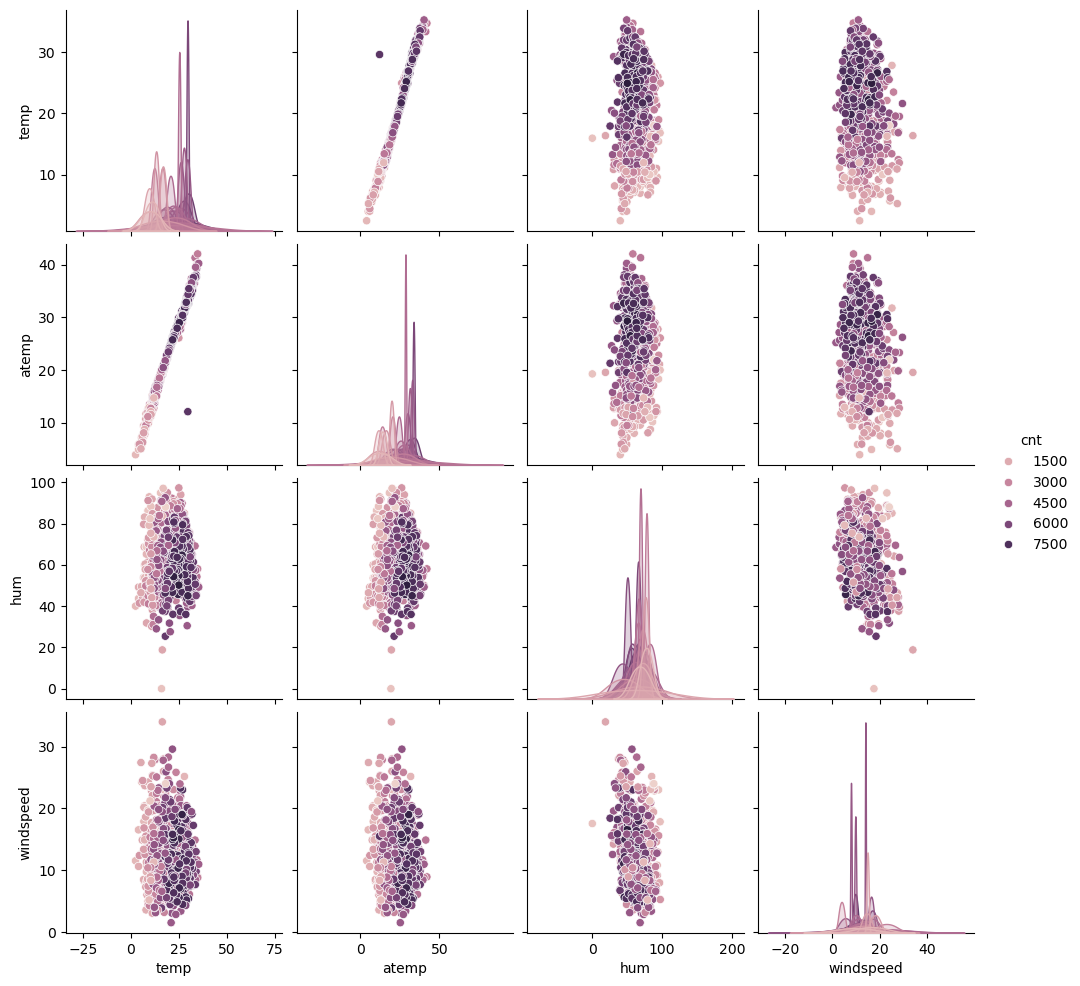

In [23]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed'],hue='cnt')
plt.show()

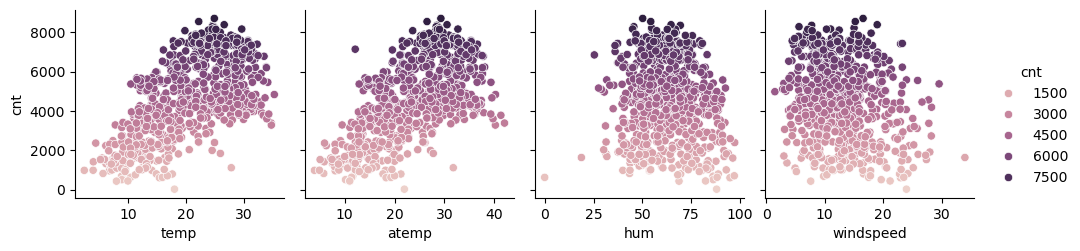

In [24]:
sns.pairplot(data=bike,x_vars=list(plotconfig.keys()),y_vars=['cnt'],hue='cnt')
plt.show()

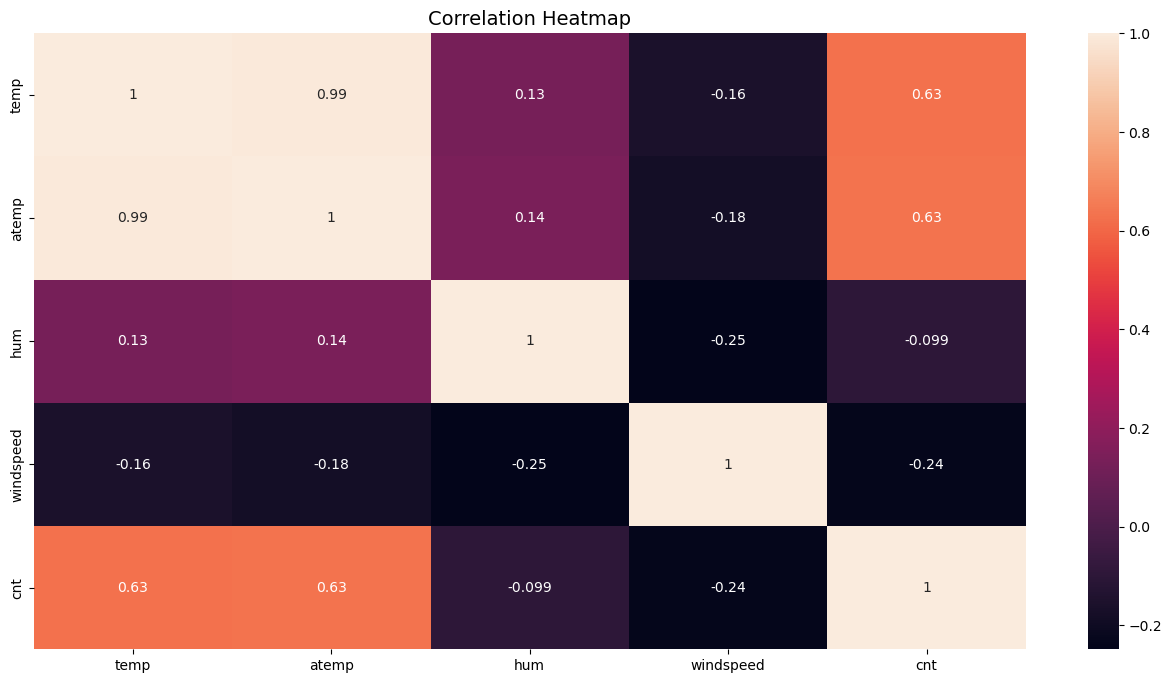

In [25]:
bike_corr=bike[['temp','atemp','hum','windspeed','cnt']].corr()
plt.figure(figsize=(16,8))
sns.heatmap(bike_corr,annot=True)
plt.title('Correlation Heatmap',fontsize=14)
plt.show()

## <span style="color:blue; font-weight : bold; font-family:'Calibri';">Data Preparation</span>

In [27]:
#introduce dummy variables
bike=pd.get_dummies(data=bike,columns=['season','mnth','weekday','weathersit'],drop_first=True)

In [28]:
#check column
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [29]:
#check shape
bike.shape

(730, 30)

In [30]:
#training and test data split into 70-30 ratio
X=bike.drop('cnt',axis=1)
y=bike['cnt']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [31]:
#check the train data
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
576,1,0,1,29.246653,33.1448,70.4167,11.083475,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
728,1,0,0,10.489153,11.5850,48.3333,23.500518,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


In [32]:
#scale values, transform training and test set
scale=StandardScaler()
X_train_scale=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test_scale=pd.DataFrame(scale.transform(X_test),columns=X_test.columns,index=X_test.index)

In [33]:
#check the scaled values
X_train_scale.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_good,weathersit_moderate
653,0.984435,-0.161731,0.691564,-0.121335,-0.055878,-0.514725,-0.117752,-0.566783,-0.569803,1.736591,-0.326023,-0.303442,-0.267261,-0.311086,-0.287754,-0.28374,-0.32969,-0.303442,-0.307279,3.254368,-0.295669,-0.408715,-0.382188,-0.428129,-0.434524,-0.421698,2.571369,0.770552,-0.722764
576,0.984435,-0.161731,0.691564,1.231731,1.194106,0.516433,-0.330615,-0.566783,-0.569803,-0.575841,-0.326023,-0.303442,-0.267261,-0.311086,3.475187,-0.28374,-0.32969,-0.303442,-0.307279,-0.307279,-0.295669,-0.408715,-0.382188,-0.428129,-0.434524,-0.421698,2.571369,0.770552,-0.722764
426,0.984435,-0.161731,-1.445998,-0.420478,-0.348834,-0.069854,-0.385694,1.764342,-0.569803,-0.575841,-0.326023,-0.303442,-0.267261,-0.311086,-0.287754,-0.28374,3.03315,-0.303442,-0.307279,-0.307279,-0.295669,-0.408715,-0.382188,2.335743,-0.434524,-0.421698,-0.388898,-1.297771,1.383577
728,0.984435,-0.161731,-1.445998,-1.294913,-1.473492,-1.045032,2.018143,1.764342,-0.569803,-0.575841,-0.326023,3.295522,-0.267261,-0.311086,-0.287754,-0.28374,-0.32969,-0.303442,-0.307279,-0.307279,-0.295669,2.446692,-0.382188,-0.428129,-0.434524,-0.421698,-0.388898,0.770552,-0.722764
482,0.984435,-0.161731,-1.445998,-0.627580,-0.571474,-1.000840,-0.779889,-0.566783,1.754993,-0.575841,-0.326023,-0.303442,-0.267261,-0.311086,-0.287754,-0.28374,-0.32969,-0.303442,-0.307279,-0.307279,-0.295669,-0.408715,-0.382188,2.335743,-0.434524,-0.421698,-0.388898,-1.297771,1.383577


#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">RFE, Select and Reject columns, R² score, Calcuate VIF

In [35]:
#create the Recursive Feature Elimination (RFE)
lr=LinearRegression()
rfe=RFE(lr,n_features_to_select=15)
rfe=rfe.fit(X_train_scale,y_train)

In [36]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
        True,  True])

In [37]:
list(zip(X_train_scale.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 10),
 ('mnth_December', False, 4),
 ('mnth_February', False, 5),
 ('mnth_January', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_March', False, 15),
 ('mnth_May', False, 6),
 ('mnth_November', False, 3),
 ('mnth_October', False, 11),
 ('mnth_September', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 12),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 9),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [38]:
select=X_train_scale.columns[rfe.support_]
select

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_September', 'weekday_Monday', 'weekday_Sunday', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [39]:
reject=X_train_scale.columns[~rfe.support_]
reject

Index(['atemp', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_October', 'weekday_Saturday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [40]:
#defining adjusted R²
def adj_r2(y_true,y_pred,n_features):
    r2=r2_score(y_true,y_pred)
    n=len(y_true)
    adj_r2=1-((1-r2)*(n-1)/(n-n_features-1))
    return adj_r2

In [41]:
#defining Variance Inflation Factor (VIF)
def calc_vif(X_train):
    vif = pd.DataFrame()
    vif["Features"]=X_train.columns
    vif["VIF"]=[variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    vif['VIF']=round(vif['VIF'], 2)
    return vif.sort_values(by='VIF',ascending = False)

In [42]:
#defining Ordinary Least Squares (OLS) model
def gen_mod(X_train,y_train):
    X_train_sm=sm.add_constant(X_train)
    lr=sm.OLS(y_train,X_train_sm).fit()
    print(lr.summary())
    return {'model':lr,'X_train_sm':X_train_sm}

In [43]:
#First model of Ordinary Least Squares coefficient of Linear Regression 
X_train_rfe1=X_train_scale[select]
gen_mod(X_train_rfe1,y_train)
calc_vif(X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.83e-191
Time:                        18:29:12   Log-Likelihood:                -4109.4
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     495   BIC:                             8312.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4486.3824    

,Features,VIF
1,holiday,inf
2,workingday,inf
11,weekday_Monday,inf
12,weekday_Sunday,inf
13,weathersit_good,10.22
14,weathersit_moderate,8.84
6,season_spring,4.99
3,temp,3.60
8,season_winter,3.49
7,season_summer,2.61


In [44]:
#RFE 2 after dropping weekday_Monday with a higher pvalue of 0.216
X_train_rfe2=X_train_rfe1.drop(['weekday_Monday'],axis=1)
gen_mod(X_train_rfe2,y_train)
calc_vif(X_train_rfe2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.13e-191
Time:                        18:29:12   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4486.3824    

,Features,VIF
12,weathersit_good,10.23
13,weathersit_moderate,8.84
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
7,season_summer,2.61
4,hum,1.91
2,workingday,1.88
11,weekday_Sunday,1.78
9,mnth_July,1.49


In [45]:
#RFE 3 after dropping weathersit_good with a higher VIF 10.23
X_train_rfe3=X_train_rfe2.drop(['weathersit_good'],axis=1)
gen_mod(X_train_rfe3,y_train)
calc_vif(X_train_rfe3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.61e-175
Time:                        18:29:12   Log-Likelihood:                -4150.2
No. Observations:                 510   AIC:                             8328.
Df Residuals:                     496   BIC:                             8388.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4486.3824    

,Features,VIF
6,season_spring,4.99
3,temp,3.56
8,season_winter,3.49
7,season_summer,2.61
2,workingday,1.87
11,weekday_Sunday,1.77
4,hum,1.61
9,mnth_July,1.49
12,weathersit_moderate,1.40
10,mnth_September,1.30


In [46]:
#RFE 4 after dropping season_spring with a higher pvalue of 0.62 and higher VIF 4.99
X_train_rfe4=X_train_rfe3.drop(['season_spring'],axis=1)
gen_mod(X_train_rfe4,y_train)
calc_vif(X_train_rfe4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     186.9
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.87e-175
Time:                        18:29:12   Log-Likelihood:                -4152.0
No. Observations:                 510   AIC:                             8330.
Df Residuals:                     497   BIC:                             8385.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4486.3824    

,Features,VIF
2,workingday,1.87
10,weekday_Sunday,1.77
4,hum,1.60
3,temp,1.58
8,mnth_July,1.43
11,weathersit_moderate,1.40
6,season_summer,1.33
7,season_winter,1.29
9,mnth_September,1.19
1,holiday,1.16


In [47]:
#RFE 5 after dropping holiday with a slightly higher pvalue of 0.051
X_train_rfe5=X_train_rfe4.drop(['holiday'],axis=1)
gen_mod(X_train_rfe5,y_train)
calc_vif(X_train_rfe5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     202.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          8.52e-176
Time:                        18:29:12   Log-Likelihood:                -4153.9
No. Observations:                 510   AIC:                             8332.
Df Residuals:                     498   BIC:                             8383.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4486.3824    

,Features,VIF
1,workingday,1.64
9,weekday_Sunday,1.63
3,hum,1.60
2,temp,1.58
7,mnth_July,1.43
10,weathersit_moderate,1.40
5,season_summer,1.33
6,season_winter,1.29
8,mnth_September,1.19
4,windspeed,1.14


In [48]:
#RFE 6 after dropping weathersit_moderate with a slightly higher pvalue of 0.026
X_train_rfe6=X_train_rfe5.drop(['weathersit_moderate'],axis=1)
final_lr=gen_mod(X_train_rfe6,y_train)
calc_vif(X_train_rfe6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     220.3
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          6.66e-176
Time:                        18:29:12   Log-Likelihood:                -4156.5
No. Observations:                 510   AIC:                             8335.
Df Residuals:                     499   BIC:                             8382.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4486.3824     37.515    119.

,Features,VIF
1,workingday,1.63
9,weekday_Sunday,1.62
2,temp,1.53
7,mnth_July,1.43
5,season_summer,1.32
6,season_winter,1.27
8,mnth_September,1.19
3,hum,1.17
4,windspeed,1.13
0,yr,1.03


## <span style="color:blue; font-weight : bold; font-family:'Calibri';">Final Model</span>

In [50]:
#Final Linear Regression model with the prediction
model,X_train_sm=final_lr.values()
y_train_predict=model.predict(X_train_sm)

<Figure size 1600x800 with 0 Axes>

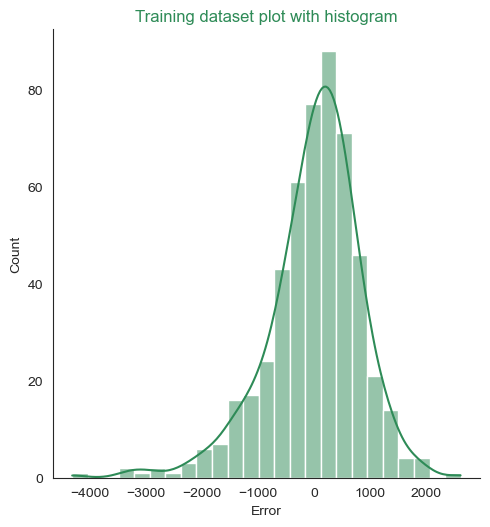

In [51]:
residual=y_train-y_train_predict
fig=plt.figure(figsize=(16,8))
sns.set_style('white')
sns.displot(residual,bins=25,kde=True,color='seagreen')
plt.xlabel('Error',fontsize=10)
plt.title('Training dataset plot with histogram',fontsize=12,color='seagreen')
plt.show()

In [52]:
#training dataset mean squared and root mean squared error
mean_square_train=mean_squared_error(y_train,y_train_predict)
root_mean_square_train=np.sqrt(mean_square_train)
print(root_mean_square_train)

838.0255324149185


In [53]:
#final model with constant and test dataset prediction
X_test_scale=X_test_scale[X_train_rfe6.columns]
X_test_sm = sm.add_constant(X_test_scale)
y_test_predict=model.predict(X_test_sm)

In [54]:
#R²
r2_test=r2_score(y_true=y_test,y_pred=y_test_predict)
r2_test=round(r2_test,2)
r2_test

0.8

In [55]:
#test dataset mean squared and root mean squared error
mean_square_test=mean_squared_error(y_test,y_test_predict)
root_mean_square_test=np.sqrt(mean_square_test)
print(root_mean_square_test)

837.7779120145374


In [56]:
#adjusted R²
adj_r2_test=round(adj_r2(y_test,y_test_predict,n_features=len(X_test_scale.columns)),2)
adj_r2_test

0.79

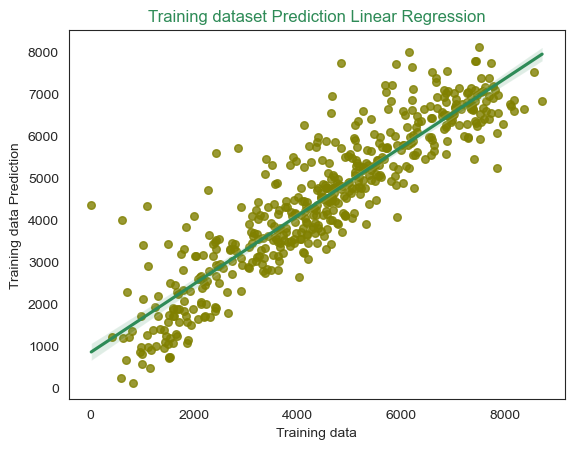

In [57]:
sns.regplot(x=y_train,y=y_train_predict,line_kws={'color':'seagreen'},scatter_kws={'s':30,'color':'olive'})
plt.title('Training dataset Prediction Linear Regression',color='seagreen')
plt.xlabel('Training data')
plt.ylabel('Training data Prediction') 
plt.show()

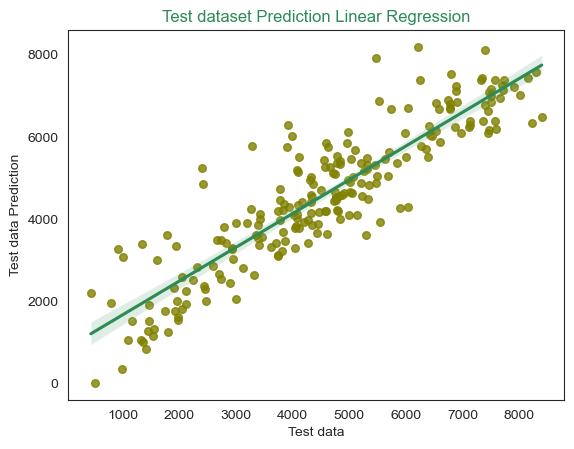

In [58]:
#predicted model plots
sns.regplot(x=y_test,y=y_test_predict,line_kws={'color':'seagreen'},scatter_kws={'s':30,'color':'olive'})
plt.title('Test dataset Prediction Linear Regression',color='seagreen')
plt.xlabel('Test data')
plt.ylabel('Test data Prediction') 
plt.show()

In [59]:
#final model Coefficients
round(model.params,2)

const             4486.38
yr                 992.37
workingday         173.47
temp              1233.74
hum               -439.25
windspeed         -352.72
season_summer      303.49
season_winter      508.77
mnth_July         -121.34
mnth_September     207.04
weekday_Sunday     159.18
dtype: float64

In [60]:
#R² for training dataset
r2_train=round(model.rsquared,2)
adj_r2_train=round(model.rsquared_adj,2)

In [61]:
print(f'Train dataset: R\u00b2 - {format(r2_train,".3f")} ; Adjusted R\u00b2 - {format(adj_r2_train,".3f")}')
print(f'Test dataset: R\u00b2 - {format(r2_test,".3f")} ; Adjusted R\u00b2 - {format(adj_r2_test,".3f")}')

Train dataset: R² - 0.820 ; Adjusted R² - 0.810
Test dataset: R² - 0.800 ; Adjusted R² - 0.790


## <span style="color:blue; font-weight : bold; font-family:'Calibri';">Model Evaluation</span>

#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Interpretation of Coefficients

* <span style=" font-family:'abadi';font-style;">Year: A positive coefficient of 992.37 suggests that bike rentals increased significantly in the newer year (2019 compared to 2018)</span>
* <span style=" font-family:'abadi';font-style;">Working Day: A positive coefficient of 173.47 indicates that bike rentals are slightly higher on working days compared to non-working days</span>
* <span style=" font-family:'abadi';font-style;">Temperature: The large positive coefficient of 1233.74 suggests that warmer temperatures strongly drive bike rentals</span>
* <span style=" font-family:'abadi';font-style;">Humidity: A negative coefficient of -439.25 implies that higher humidity discourages bike rentals</span>
* <span style=" font-family:'abadi';font-style;">Windspeed: A negative coefficient of -352.72 indicates that higher wind speeds reduce bike rentals</span>

#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Effects of Season & Month
* <span style=" font-family:'abadi';font-style;">Summer season: A positive coefficient of 303.49 suggests that summer sees higher bike rentals than spring/fall</span>
* <span style=" font-family:'abadi';font-style;">Winter season: A larger positive coefficient of 508.77 indicates even higher bike rentals in winter than other seasons</span>
* <span style=" font-family:'abadi';font-style;">July month: A negative coefficient of -121.34 suggests that bike rentals decreased in July compared to other months</span>
* <span style=" font-family:'abadi';font-style;">September month: A positive coefficient of 207.04 suggests an increase in bike rentals in September compared to other months.</span>
* <span style=" font-family:'abadi';font-style;">Sunday: A positive coefficient of 159.18 indicates that bike rentals are higher on Sundays compared to other days</span>

#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Model Performance

Training Set
* <span style=" font-family:'abadi';font-style;">R² = 0.820 The model explains 82% of the variance in bike rentals on the training data</span>
* <span style=" font-family:'abadi';font-style;">Adjusted R² = 0.810: Adjusted for the number of predictors, suggesting that the model is robust without overfitting</span>

Test Set
* <span style=" font-family:'abadi';font-style;">R² = 0.800 The model explains 80% of the variance in bike rentals on unseen data</span>
* <span style=" font-family:'abadi';font-style;">Adjusted R²=0.790 This drop compared to the training set suggests the model generalizes well but might have some minor overfitting</span>

#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Key Takeaways
* <span style=" font-family:'abadi';font-style;">The temperature has the strongest positive effect on bike rentals, indicating that warmer weather significantly boosts demand
* <span style=" font-family:'abadi';font-style;">High humidity and strong winds negatively impact bike rentals, likely due to reduced comfort for riders
* <span style=" font-family:'abadi';font-style;">Categorical variables (season, month, and weekday) significantly affect bike rentals, showing clear seasonal and temporal patterns:
  - <span style=" font-family:'abadi';font-style;">Bike rentals are higher in winter and summer than in spring
  - <span style=" font-family:'abadi';font-style;">Rentals dip in July but rise in September
  - <span style=" font-family:'abadi';font-style;">Sundays see more rentals compared to other weekdays
* <span style=" font-family:'abadi';font-style;">The model performs well, with high R² values on both training and test datasets, indicating good predictive power


## <span style="color:blue; font-weight : bold; font-family:'Calibri';">Recommendations for BoomBikes
#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Optimize Fleet Management
Seasonal Adjustments:
* Increase bike availability during peak seasons (winter and summer) to meet demand
Plan maintenance during low-demand months (e.g., July) to minimize disruptions

Weather-Responsive Deployment:
* Monitor weather conditions and deploy fewer bikes during high humidity or windy days to reduce operational costs

#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Targeted Marketing Campaigns
Promote Weekend Usage:
* Run promotional offers or events on Sundays to capitalize on higher demand for leisure activities

Encourage Commuting:
* Collaborate with local businesses or offices to promote bike-sharing as a sustainable commuting option on working days

Seasonal Promotions:
* Offer discounts or incentives during high-demand seasons (winter and summer) to attract more riders
#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Expand Infrastructure
Increase Docking Stations:
* Add more docking stations near parks, recreational areas, and tourist spots to cater to leisure riders, especially on weekends

Focus on Commuter Hubs:
* Place docking stations near offices, metro stations, and bus stops to encourage daily commuting
#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Enhance User Experience
Weather-Adaptive Services:
* Provide weather alerts or recommendations for riders through the app
* Offer discounted rates during unfavorable weather to maintain usage

Dynamic Pricing:
* Introduce dynamic pricing to manage demand during peak seasons and weekends
* Offer loyalty programs or subscriptions for frequent riders
#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Address Monthly Variations
Boost July Rentals:
* Investigate reasons for the dip in July (e.g., heatwaves, vacations) and counteract with promotions like discounted rides or free trials

Leverage September Demand:
* Plan marketing campaigns or events to maximize revenue during this high-demand month
#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Sustainability and Awareness
* Highlight the environmental benefits of bike-sharing programs to attract eco-conscious users
* Collaborate with local governments to promote biking as part of sustainable urban transportation
#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Data-Driven Decisions
Monitor Trends:
* Regularly update and refine the model to incorporate new data, ensuring accurate forecasting

Expand Variables:
* Include additional factors such as time of day, public holidays, and bike availability to enhance the model's predictive power

#### <span style=" font-family:'Calibri';font-style:italic;font-weight :bold">Long-Term Strategy
Expand Reach:
* Based on high demand, consider expanding the bike-sharing program to new areas or cities with similar demographic and weather conditions

Innovate Services:
* Introduce electric bikes or bike-sharing stations with integrated solar panels to attract more users and reduce operational costs